In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Setting pandas maximum rows to dsiplay in cell output
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 200

## Getting Data

In [9]:
df = pd.read_csv("day.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Dropping Irrelevant Variables

In [13]:
df.drop(['instant', 'dteday'], inplace=True, axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


### Categorical
season
yr
mnth
holiday
weekday
workingday
weathersit

In [15]:
season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
year = {0:'2018', 1:'2019'}
holiday = {0:'no', 1:'yes'}
workday = {0:'no', 1:'yes'}
weathersit = {1: 'Clear', 2:'Overcast', 3:'Light Rain', 4:'Heavy Rain'}

In [16]:
df['season'] = df['season'].map(season)
df['season'].astype('category')

df['weathersit'] = df['weathersit'].map(weathersit)
df['weathersit'].astype('category')

df['yr'] = df['yr'].map(year)
df['yr'].astype('category')

df['holiday'] = df['holiday'].map(holiday)
df['holiday'].astype('category')

df['workingday'] = df['workingday'].map(workday)
df['workingday'].astype('category')

df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')

In [17]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,1,no,6,no,Overcast,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,1,no,0,no,Overcast,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,1,no,1,yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,1,no,2,yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,1,no,3,yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    object  
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    object  
 4   weekday     730 non-null    category
 5   workingday  730 non-null    object  
 6   weathersit  730 non-null    object  
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(2), float64(4), int64(3), object(5)
memory usage: 70.7+ KB


In [19]:
df.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Exploratory Data Analysis

In [20]:
def plot_histbox(df, col):
    plt.figure(figsize= (10, 2))


    plt.subplot(1, 2, 1)
    sns.boxplot(x = col, data=df)
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.subplot(1, 2, 2)
    sns.distplot(df[col])
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.show()

### Univariate Analysis for Numerical Data

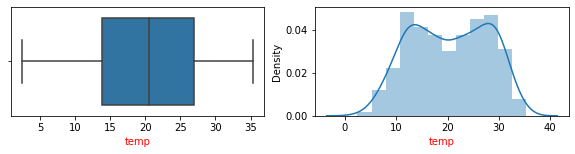

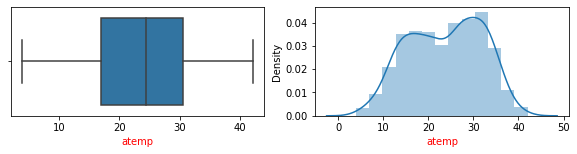

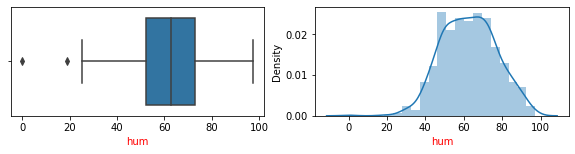

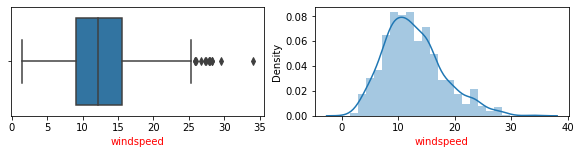

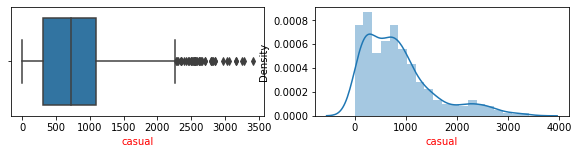

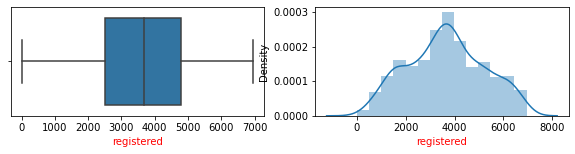

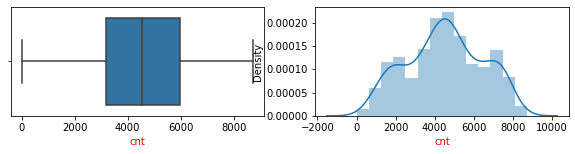

In [21]:
for col in df.select_dtypes(include=[np.number]):
    plot_histbox(df, col)

In [22]:
def plot_bar(data, col):
    fig, ax = plt.subplots(figsize=(12,3))
    data[col].value_counts(normalize=True).plot.bar()
    plt.title("Graph for {} variable".format(col))

### Univariate Analysis for Categorical Data

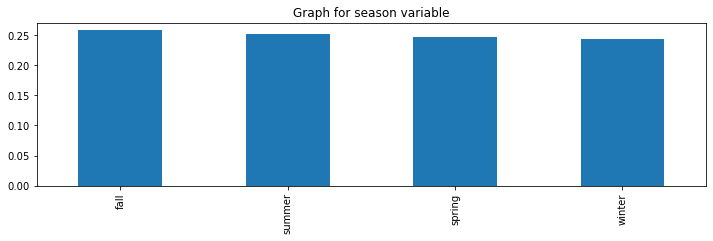

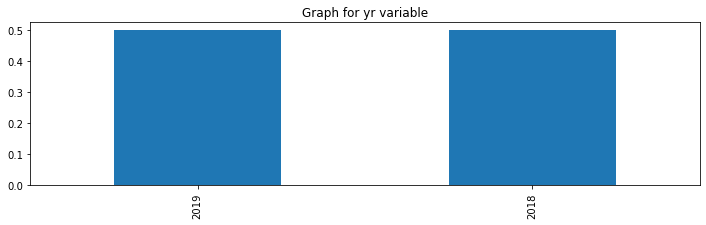

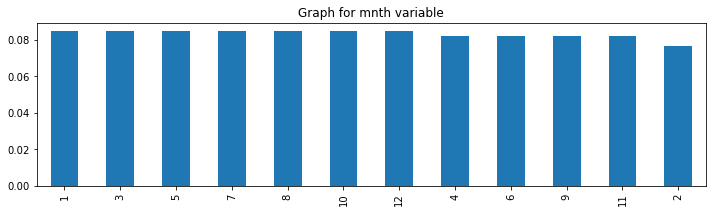

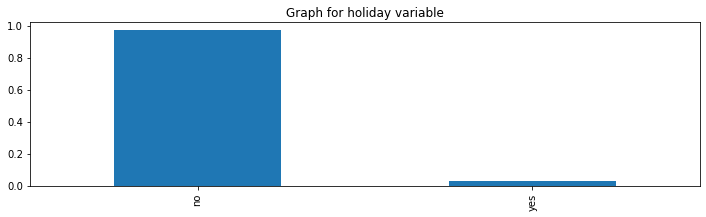

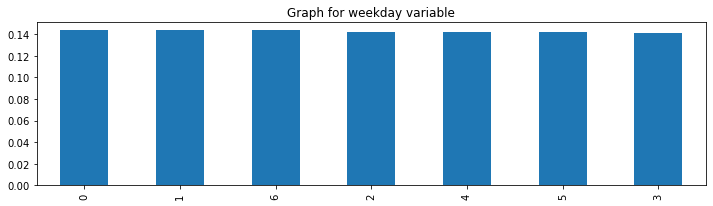

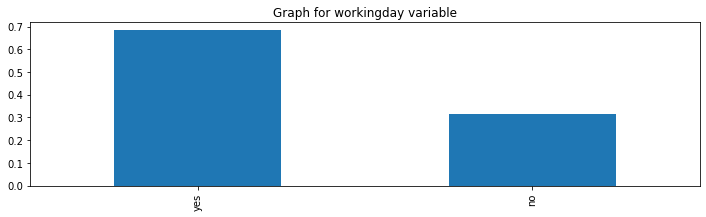

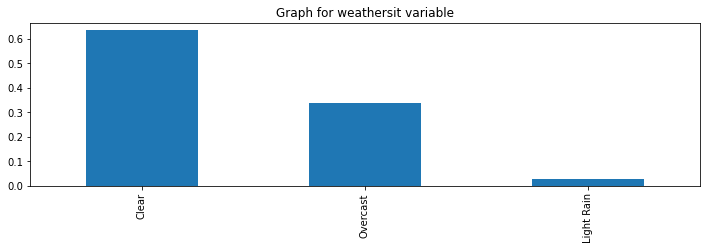

In [23]:
for col in df.select_dtypes(include=['category', 'object']):
    plot_bar(df, col)

### Bivariate Analysis for Numerical Data

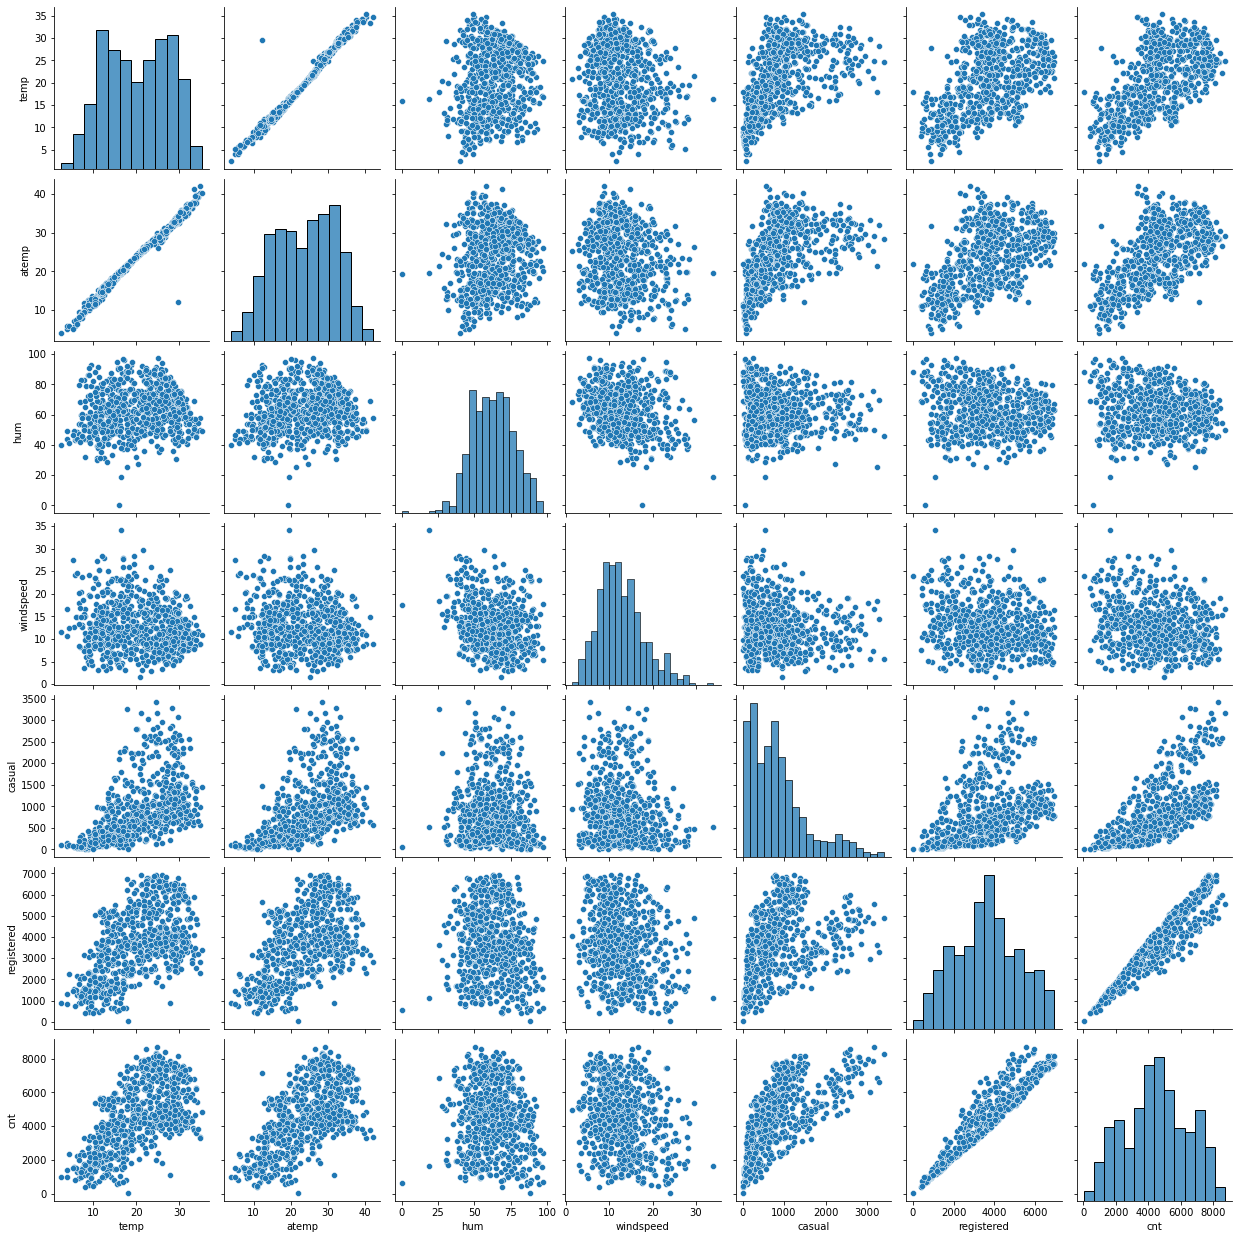

In [24]:
sns.pairplot(df.select_dtypes(include=[np.number]))

### Correlation Analysis

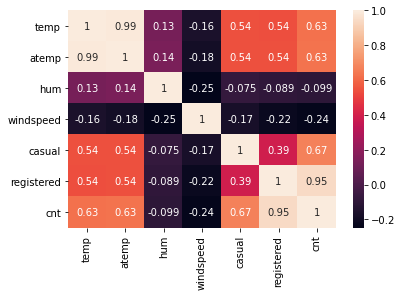

In [25]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)
plt.show()

### Checking VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
vif_data = pd.DataFrame()
vif_data['features'] = df.select_dtypes(include=[np.number]).drop(['registered'], axis=1).columns
vif_data['VIF'] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).drop(['registered'], axis=1).values, i) 
                   for i in range(len(df.select_dtypes(include=[np.number]).drop(['registered'], axis=1).columns))]

In [28]:
vif_data

,features,VIF
0,temp,491.657329
1,atemp,564.012771
2,hum,11.376900
3,windspeed,4.716426
4,casual,4.847552
5,cnt,13.439020


#### Dropping atemp, cnt, registered

In [29]:
vif_data = pd.DataFrame()
vif_data['features'] = df.select_dtypes(include=[np.number]).drop(['registered','atemp', 'cnt'], axis=1).columns
vif_data['VIF'] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).drop(['registered', 'atemp', 'cnt'], axis=1).values, i) 
                   for i in range(len(df.select_dtypes(include=[np.number]).drop(['registered', 'atemp', 'cnt'], axis=1).columns))]

In [30]:
vif_data

,features,VIF
0,temp,11.524287
1,hum,9.204303
2,windspeed,4.693555
3,casual,3.686119


#### Dropping hum

In [31]:
vif_data = pd.DataFrame()
vif_data['features'] = df.select_dtypes(include=[np.number]).drop(['registered','atemp', 'cnt', 'hum'], axis=1).columns
vif_data['VIF'] = [variance_inflation_factor(df.select_dtypes(include=[np.number]).drop(['registered', 'atemp', 'cnt', 'hum'], axis=1).values, i) 
                   for i in range(len(df.select_dtypes(include=[np.number]).drop(['registered', 'atemp', 'cnt', 'hum'], axis=1).columns))]

In [32]:
vif_data

,features,VIF
0,temp,6.938213
1,windspeed,3.635139
2,casual,3.625523


In [33]:
###Final columns to drop
col_to_drop = ['atemp', 'hum']

### Bivariate Analysis for Categorical Variable

In [34]:
def plot_barcat(dataset, col):
    
    plt.figure(figsize= (14, 3))


    plt.subplot(1, 2, 1)
    sns.stripplot(x = col, y='cnt', data=df)
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})
    
    plt.subplot(1, 2, 2)
    sns.barplot(x= col, y='cnt', data=df)
    plt.xlabel(col, fontdict= {'fontsize':10, 'fontweight':3, 'color':'Red'})

    
    
    plt.show()

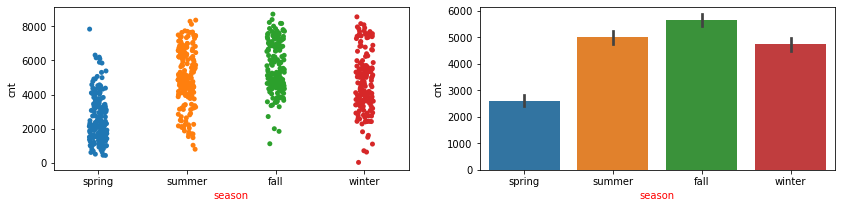

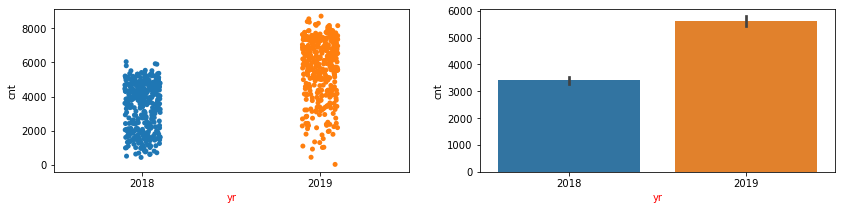

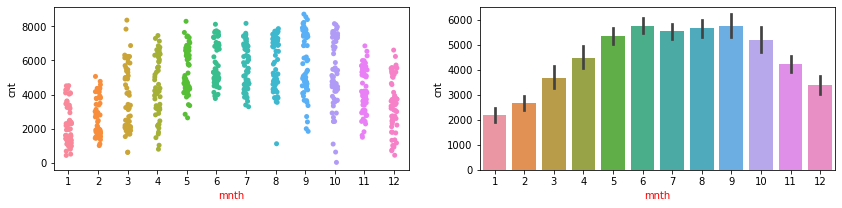

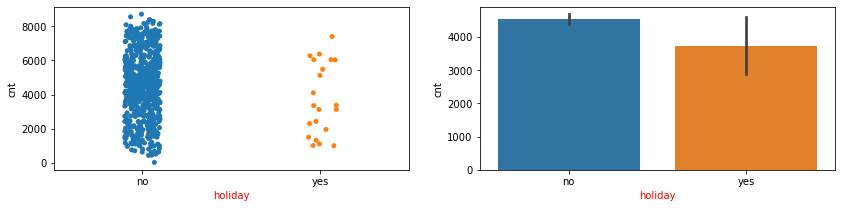

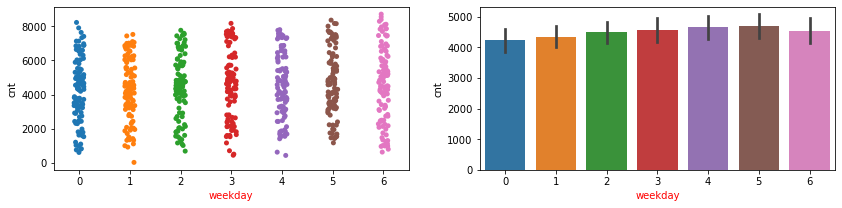

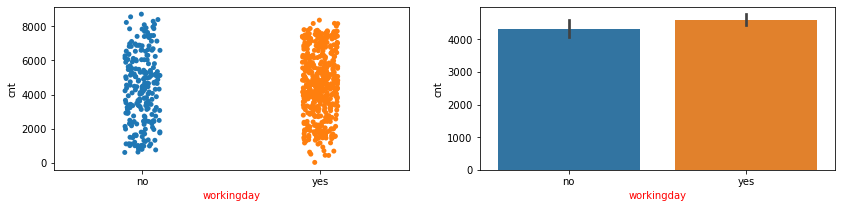

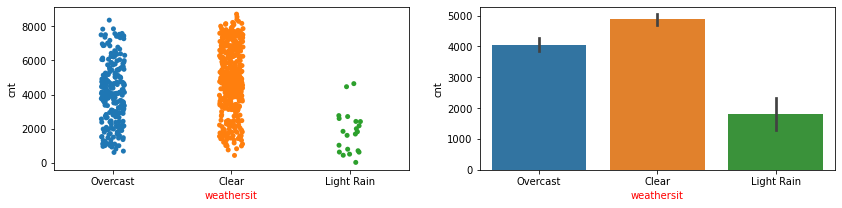

In [35]:
for col in df.select_dtypes(exclude=[np.number]):
    plot_barcat(df, col)

In [36]:
def plot_by_user(dataset, col):
    plt.figure(figsize=(15,3))
    
    plt.subplot(1, 3, 1)
    sns.barplot(x=col, y='casual', data=dataset)
    plt.title("Graph for {} variable for Casual users".format(col))
    
    plt.subplot(1, 3, 2)
    sns.barplot(x=col, y='registered', data=dataset)
    plt.title("Graph for {} variable for registered users".format(col))
    
    plt.subplot(1, 3, 3)
    sns.barplot(x=col, y='cnt', data=dataset)
    plt.title("Graph for {} variable for All users".format(col))

### Checking relationship of Categorical Variables with Casual, Registered and All Users

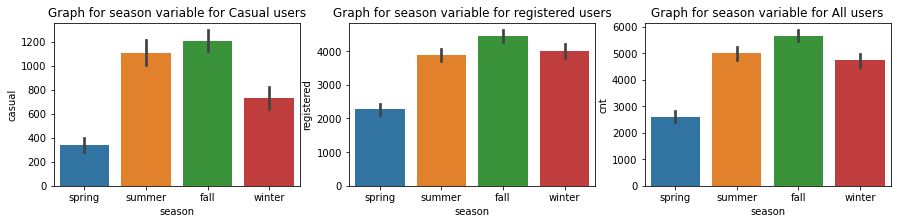

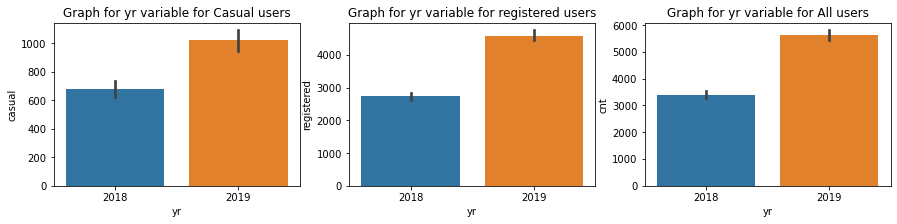

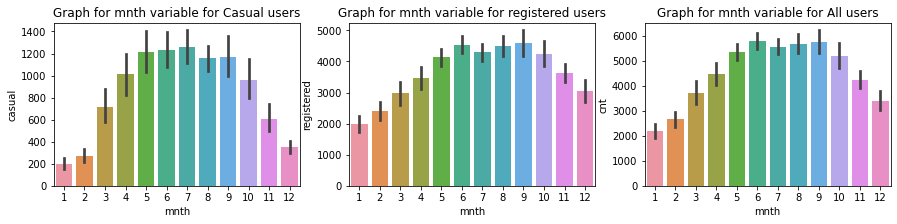

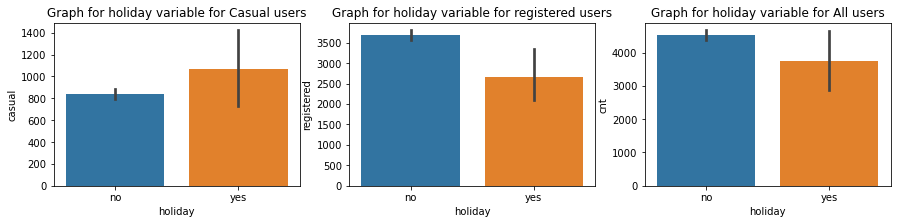

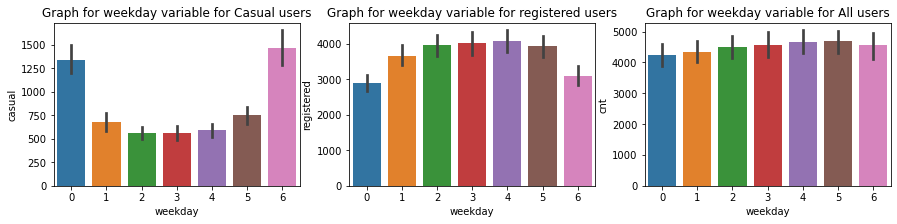

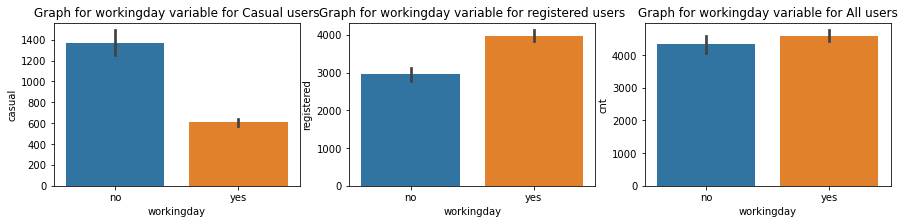

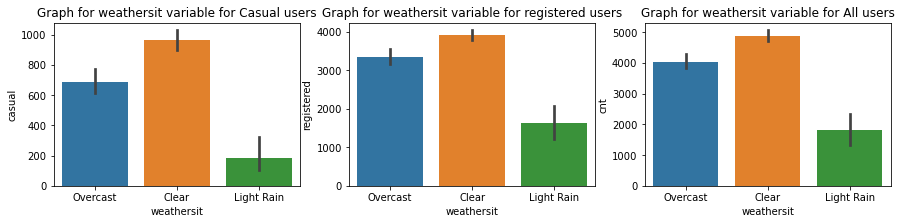

In [37]:
for col in df.select_dtypes(exclude=[np.number]):
    plot_by_user(df, col)

##### We see that from above graphs the demand of All users is mostly same for variables like Working Day, Weekday even though
##### for casual and registered users it is different but the compensation is reflected in Total Count as we saw so we can safely
##### remove these variables as well as Registered and Casual features as our target variable is Total Count which signifies the total
##### demand which needs to be fulfilled

In [38]:
col_to_drop.extend(['workingday', 'weekday', 'registered', 'casual'])

In [39]:
col_to_drop

['atemp', 'hum', 'workingday', 'weekday', 'registered', 'casual']

In [40]:
## Dropping columns
df.drop(col_to_drop, axis=1, inplace=True)

In [41]:
df.head()

,season,yr,mnth,holiday,weathersit,temp,windspeed,cnt
0,spring,2018,1,no,Overcast,14.110847,10.749882,985
1,spring,2018,1,no,Overcast,14.902598,16.652113,801
2,spring,2018,1,no,Clear,8.050924,16.636703,1349
3,spring,2018,1,no,Clear,8.200000,10.739832,1562
4,spring,2018,1,no,Clear,9.305237,12.522300,1600


## Getting Dummy Variables for Categorical Data

In [42]:
dummies = pd.get_dummies(df[['season', 'yr', 'mnth', 'holiday', 'weathersit']], drop_first=True)

In [43]:
dummies

,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_yes,weathersit_Light Rain,weathersit_Overcast
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
df = pd.concat([df, dummies], axis=1)
df.head()

,season,yr,mnth,holiday,weathersit,temp,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_yes,weathersit_Light Rain,weathersit_Overcast
0,spring,2018,1,no,Overcast,14.110847,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,spring,2018,1,no,Overcast,14.902598,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,spring,2018,1,no,Clear,8.050924,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,spring,2018,1,no,Clear,8.200000,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,2018,1,no,Clear,9.305237,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
df.drop(['season', 'yr', 'mnth', 'holiday', 'weathersit'], axis=1, inplace=True)

## Splitting into Train and Test

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

## Scaling the Numerical Features between the value of 0 and 1 using MinMax scaler from sklearn

In [48]:
scaler = MinMaxScaler()

In [49]:
num_vars = ['temp', 'windspeed']

In [50]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

In [52]:
X_train.head()

,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_yes,weathersit_Light Rain,weathersit_Overcast
576,0.815169,0.264686,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
426,0.442393,0.255342,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
728,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.188475,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
111,0.345824,0.380981,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [53]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [54]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          2.27e-180
Time:                        00:15:13   Log-Likelihood:                -4118.6
No. Observations:                 510   AIC:                             8279.
Df Residuals:                     489   BIC:                             8368.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1592.4789    321.398      4.955      0.000     960.988    2223.970
temp                   3474.2181    398.106      8.727      0.000    2692.008    4256.428
windspeed             -1365.9906    222.122     -6.150      0.000   -1802.422    -929.559
season_spring          -429.8393    268.067     -1.603      0.109    -956.544      96.866
season_summer           301.2404    233.275      1.291      0.197    -157.104     759.584
season_winter           891.2990    249.945      3.566      0.000     400.200    1382.398
yr_2019                2045.5181     71.687     28.534      0.000    1904.666    2186.371
mnth_2                  289.2885    184.175      1.571      0.117     -72.584     651.161
mnth_3                  662.2670    199.062      3.327      0.001     271.145    1053.389
mnth_4                  682.1022    297.918      2.290      0.022      96.745    1267.459
mnth_5                  837.6282    323.025      2.593      0.010     202.941    1472.316
mnth_6                  789.3181    341.869      2.309      0.021     117.604    1461.032
mnth_7                  409.8215    388.532      1.055      0.292    -353.577    1173.220
mnth_8                  860.9080    371.214      2.319      0.021     131.537    1590.279
mnth_9                 1355.1672    334.118      4.056      0.000     698.684    2011.651
mnth_10                 583.2065    308.857      1.888      0.060     -23.645    1190.058
mnth_11                 202.9626    293.999      0.690      0.490    -374.695     780.621
mnth_12                 142.1497    237.272      0.599      0.549    -324.048     608.348
holiday_yes            -751.9938    228.595     -3.290      0.001   -1201.143    -302.845
weathersit_Light Rain -2527.0162    215.667    -11.717      0.000   -2950.765   -2103.267
weathersit_Overcast    -700.6409     76.342     -9.178      0.000    -850.640    -550.642
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.822
Skew:                          -0.732   Prob(JB):                     3.00e-43
Kurtosis:                       5.659   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)

In [56]:
vif

,Features,VIF
0,temp,37.646096
4,season_winter,9.008937
12,mnth_8,7.960352
3,season_summer,7.378508
11,mnth_7,7.295457
9,mnth_5,6.714510
10,mnth_6,6.498342
14,mnth_10,5.891299
13,mnth_9,5.274281
15,mnth_11,5.121712


### Removing features based on VIF

##### We saw mnth_11 has High p-value as well as High VIF, removing it first

In [57]:
X = X_train.drop(['mnth_11'], axis = 1)

In [58]:
## Need to remove mnth_11 so adding to list
from_test = ['mnth_11']

In [59]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          2.43e-181
Time:                        00:15:13   Log-Likelihood:                -4118.9
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     490   BIC:                             8362.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1678.3275    296.207      5.666      0.000    1096.335    2260.320
temp                   3529.9335    389.632      9.060      0.000    2764.378    4295.489
windspeed             -1349.1281    220.657     -6.114      0.000   -1782.679    -915.577
season_spring          -498.4344    248.839     -2.003      0.046    -987.357      -9.512
season_summer           265.2356    227.248      1.167      0.244    -181.265     711.737
season_winter           948.0005    235.939      4.018      0.000     484.424    1411.577
yr_2019                2042.4916     71.515     28.560      0.000    1901.979    2183.005
mnth_2                  250.3587    175.236      1.429      0.154     -93.948     594.665
mnth_3                  605.5419    181.215      3.342      0.001     249.488     961.596
mnth_4                  599.2841    272.551      2.199      0.028      63.772    1134.796
mnth_5                  748.4947    295.941      2.529      0.012     167.025    1329.964
mnth_6                  680.3300    303.071      2.245      0.025      84.850    1275.810
mnth_7                  273.2247    334.196      0.818      0.414    -383.409     929.859
mnth_8                  728.1463    317.347      2.294      0.022     104.618    1351.674
mnth_9                 1215.4124    265.663      4.575      0.000     693.432    1737.393
mnth_10                 407.7194    175.335      2.325      0.020      63.219     752.220
mnth_12                  15.6275    150.615      0.104      0.917    -280.303     311.558
holiday_yes            -739.6830    227.776     -3.247      0.001   -1187.222    -292.144
weathersit_Light Rain -2524.9019    215.530    -11.715      0.000   -2948.380   -2101.424
weathersit_Overcast    -702.2791     76.265     -9.208      0.000    -852.125    -552.433
==============================================================================
Omnibus:                       73.373   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.938
Skew:                          -0.722   Prob(JB):                     3.45e-42
Kurtosis:                       5.627   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)

In [61]:
vif

,Features,VIF
0,temp,31.571717
3,season_summer,7.378248
12,mnth_8,6.652824
11,mnth_7,6.110070
9,mnth_5,5.917276
10,mnth_6,5.519558
1,windspeed,4.894820
4,season_winter,4.853219
8,mnth_4,4.541531
2,season_spring,3.914131


##### We saw mnth_7 has High p-value as well as High VIF, removing it next

In [62]:
X = X.drop(['mnth_7'], axis=1)

In [63]:
### Adding mnth_7 to list so that these can be drop from test data at the time of prediction
from_test.append('mnth_7')

In [64]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     143.4
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          2.78e-182
Time:                        00:15:13   Log-Likelihood:                -4119.2
No. Observations:                 510   AIC:                             8276.
Df Residuals:                     491   BIC:                             8357.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1760.5439    278.520      6.321      0.000    1213.307    2307.781
temp                   3708.1133    322.868     11.485      0.000    3073.739    4342.487
windspeed             -1350.3877    220.577     -6.122      0.000   -1783.780    -916.996
season_spring          -604.2228    212.478     -2.844      0.005   -1021.702    -186.744
season_summer           213.0601    218.029      0.977      0.329    -215.325     641.445
season_winter           823.3782    180.026      4.574      0.000     469.661    1177.095
yr_2019                2039.6428     71.406     28.564      0.000    1899.345    2179.941
mnth_2                  226.2939    172.688      1.310      0.191    -113.005     565.592
mnth_3                  538.3853    161.474      3.334      0.001     221.120     855.650
mnth_4                  483.6886    232.929      2.077      0.038      26.029     941.348
mnth_5                  604.2942    237.557      2.544      0.011     137.541    1071.047
mnth_6                  495.8276    202.226      2.452      0.015      98.492     893.163
mnth_8                  504.8002    161.432      3.127      0.002     187.618     821.983
mnth_9                 1040.0386    156.673      6.638      0.000     732.207    1347.870
mnth_10                 359.7783    165.183      2.178      0.030      35.226     684.330
mnth_12                  -4.6628    148.506     -0.031      0.975    -296.448     287.123
holiday_yes            -761.7289    226.098     -3.369      0.001   -1205.968    -317.490
weathersit_Light Rain -2528.3290    215.417    -11.737      0.000   -2951.582   -2105.077
weathersit_Overcast    -703.2571     76.229     -9.226      0.000    -853.033    -553.481
==============================================================================
Omnibus:                       71.419   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.064
Skew:                          -0.712   Prob(JB):                     4.81e-40
Kurtosis:                       5.548   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,season_summer,7.262467
0,temp,6.676300
1,windspeed,4.863092
9,mnth_5,3.771964
8,mnth_4,3.442232
2,season_spring,3.119264
4,season_winter,2.929673
10,mnth_6,2.484144
5,yr_2019,2.094772
7,mnth_3,2.055958


##### We saw season_summer has High p-value as well as High VIF, removing it next

In [66]:
X = X.drop(['season_summer'], axis=1)

In [67]:
### Adding to list
from_test.append('season_summer')

In [68]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          3.57e-183
Time:                        00:15:13   Log-Likelihood:                -4119.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     492   BIC:                             8352.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1892.6992    243.472      7.774      0.000    1414.326    2371.072
temp                   3566.8189    288.670     12.356      0.000    2999.642    4133.996
windspeed             -1346.8187    220.537     -6.107      0.000   -1780.129    -913.508
season_spring          -726.6124    171.634     -4.233      0.000   -1063.838    -389.386
season_winter           745.2339    161.284      4.621      0.000     428.344    1062.124
yr_2019                2042.9875     71.320     28.645      0.000    1902.858    2183.117
mnth_2                  252.1857    170.635      1.478      0.140     -83.078     587.450
mnth_3                  615.1612    141.065      4.361      0.000     337.997     892.325
mnth_4                  629.7360    178.652      3.525      0.000     278.722     980.750
mnth_5                  772.4987    163.716      4.719      0.000     450.831    1094.167
mnth_6                  605.6651    168.105      3.603      0.000     275.373     935.957
mnth_8                  481.7030    159.685      3.017      0.003     167.955     795.451
mnth_9                 1018.4649    155.102      6.566      0.000     713.720    1323.209
mnth_10                 375.4833    164.391      2.284      0.023      52.488     698.479
mnth_12                  -2.4886    148.482     -0.017      0.987    -294.226     289.249
holiday_yes            -754.6927    225.973     -3.340      0.001   -1198.684    -310.702
weathersit_Light Rain -2531.5431    215.382    -11.754      0.000   -2954.725   -2108.361
weathersit_Overcast    -698.2954     76.057     -9.181      0.000    -847.731    -548.859
==============================================================================
Omnibus:                       72.370   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.429
Skew:                          -0.714   Prob(JB):                     2.00e-41
Kurtosis:                       5.604   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,temp,6.657191
1,windspeed,4.734202
3,season_winter,2.868693
2,season_spring,2.662098
4,yr_2019,2.086565
10,mnth_8,1.940033
12,mnth_10,1.814747
9,mnth_6,1.688740
8,mnth_5,1.607716
5,mnth_2,1.559955


##### We saw mnth_12 has High p-value but low VIF, removing it next

In [70]:
X = X.drop(['mnth_12'], axis=1)

In [71]:
### Adding to list
from_test.append('mnth_12')

In [72]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          2.76e-184
Time:                        00:15:13   Log-Likelihood:                -4119.7
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     493   BIC:                             8345.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1892.0726    240.340      7.872      0.000    1419.856    2364.290
temp                   3567.3244    286.798     12.438      0.000    3003.827    4130.822
windspeed             -1346.6721    220.140     -6.117      0.000   -1779.200    -914.144
season_spring          -726.7135    171.354     -4.241      0.000   -1063.387    -390.040
season_winter           744.6567    157.404      4.731      0.000     435.392    1053.922
yr_2019                2043.0092     71.236     28.679      0.000    1903.045    2182.973
mnth_2                  252.6866    167.828      1.506      0.133     -77.059     582.432
mnth_3                  615.5736    138.762      4.436      0.000     342.936     888.211
mnth_4                  630.0296    177.610      3.547      0.000     281.064     978.996
mnth_5                  772.7409    162.911      4.743      0.000     452.655    1092.827
mnth_6                  605.8447    167.593      3.615      0.000     276.560     935.129
mnth_8                  481.8710    159.208      3.027      0.003     169.060     794.682
mnth_9                 1018.8081    153.588      6.633      0.000     717.040    1320.576
mnth_10                 376.3596    155.696      2.417      0.016      70.450     682.269
holiday_yes            -754.5012    225.455     -3.347      0.001   -1197.472    -311.530
weathersit_Light Rain -2531.5215    215.159    -11.766      0.000   -2954.264   -2108.779
weathersit_Overcast    -698.2952     75.980     -9.191      0.000    -847.579    -549.012
==============================================================================
Omnibus:                       72.359   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.373
Skew:                          -0.714   Prob(JB):                     2.05e-41
Kurtosis:                       5.604   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,temp,6.642698
1,windspeed,4.734035
2,season_spring,2.531940
3,season_winter,2.335598
4,yr_2019,2.086276
10,mnth_8,1.936739
9,mnth_6,1.686508
8,mnth_5,1.605440
12,mnth_10,1.599828
15,weathersit_Overcast,1.554350


##### We saw mnth_2 has High p-value and low VIF, removing it next

In [74]:
X = X.drop(['mnth_2'], axis=1)

In [75]:
from_test.append('mnth_2')

In [76]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):          6.38e-185
Time:                        00:15:14   Log-Likelihood:                -4120.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     494   BIC:                             8342.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1912.9446    240.247      7.962      0.000    1440.912    2384.977
temp                   3549.9321    286.933     12.372      0.000    2986.173    4113.691
windspeed             -1318.3618    219.616     -6.003      0.000   -1749.859    -886.865
season_spring          -667.6852    167.022     -3.998      0.000    -995.847    -339.523
season_winter           723.6906    156.987      4.610      0.000     415.245    1032.136
yr_2019                2043.7455     71.326     28.654      0.000    1903.606    2183.885
mnth_3                  552.8543    132.531      4.171      0.000     292.460     813.249
mnth_4                  605.4837    177.087      3.419      0.001     257.547     953.420
mnth_5                  755.0997    162.698      4.641      0.000     435.435    1074.765
mnth_6                  589.8349    167.469      3.522      0.000     260.795     918.875
mnth_8                  467.7289    159.135      2.939      0.003     155.064     780.393
mnth_9                 1007.1991    153.591      6.558      0.000     705.427    1308.971
mnth_10                 376.0161    155.895      2.412      0.016      69.716     682.316
holiday_yes            -749.2664    225.717     -3.319      0.001   -1192.750    -305.783
weathersit_Light Rain -2523.7680    215.373    -11.718      0.000   -2946.929   -2100.607
weathersit_Overcast    -699.9292     76.069     -9.201      0.000    -849.388    -550.470
==============================================================================
Omnibus:                       73.611   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.456
Skew:                          -0.726   Prob(JB):                     4.39e-42
Kurtosis:                       5.618   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,temp,6.641163
1,windspeed,4.679693
3,season_winter,2.324831
2,season_spring,2.102044
4,yr_2019,2.086099
9,mnth_8,1.931586
8,mnth_6,1.681565
7,mnth_5,1.600452
11,mnth_10,1.599581
14,weathersit_Overcast,1.554335


#### The above features are most significant to our calculation

## Residual Analysis

In [78]:
y_train_pred = lr_model.predict(X_train_sm)

In [79]:
res = y_train - y_train_pred

<AxesSubplot:ylabel='Density'>

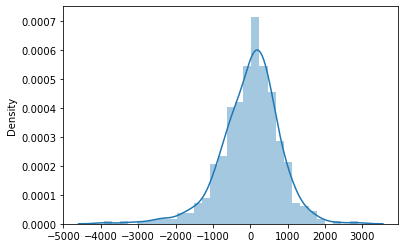

In [80]:
sns.distplot(res)

##### From above we see that the distribution is centered at 0 and is approximately normal which fulfills the condition of Linear Regression

### Making predictions on Test Set

#### Scaling the Test data features using MinMaxScaler we used for train

In [81]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [82]:
df_test.describe()

,temp,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_yes,weathersit_Light Rain,weathersit_Overcast
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.313293,4560.559091,0.254545,0.263636,0.236364,0.481818,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.036364,0.027273,0.318182
std,0.233187,0.159584,1904.968544,0.436599,0.441609,0.425817,0.500809,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.187620,0.163248,0.466833
min,0.046591,-0.042808,441.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.198843,3312.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.300126,4582.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.755981,0.402718,5913.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.984424,0.807474,8395.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
y_test = df_test.pop('cnt')

In [84]:
X_test = df_test

In [85]:
##Adding constant to test set before applying model
X_test_sm = sm.add_constant(X_test)

In [86]:
X_test_sm.head()

,const,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_yes,weathersit_Light Rain,weathersit_Overcast
184,1.0,0.831783,0.084219,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
535,1.0,0.901354,0.153728,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
299,1.0,0.511964,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
152,1.0,0.817246,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [87]:
##Dropping variables we saw from Checking VIF during model training
X_test_sm.drop(from_test, axis=1, inplace=True)

In [88]:
X_test_sm.head()

,const,temp,windspeed,season_spring,season_winter,yr_2019,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,holiday_yes,weathersit_Light Rain,weathersit_Overcast
184,1.0,0.831783,0.084219,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1.0,0.901354,0.153728,0,0,1,0,0,0,1,0,0,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,0,0,0,0,1,0,0,1
221,1.0,0.881625,0.339570,0,0,0,0,0,0,0,1,0,0,0,0,0
152,1.0,0.817246,0.537414,0,0,0,0,0,0,1,0,0,0,0,0,0


## Making predictions for Test Data

In [89]:
y_test_pred = lr_model.predict(X_test_sm)

### Checking R-squared score on test set

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8190495902661699